# **Fine-tune Model**

In [1]:
!pip install -q google-generativeai


This command installs the google-generativeai library, which is required for working with Google Gemini models.

In [2]:
import google.generativeai as genai

The google.generativeai library is imported and given the alias genai for convenience.To access all the functions and tools provided by the google-generativeai library.

In [3]:
from google.colab import userdata
genai.configure(api_key=userdata.get('GOOGLE_API_KEY'))

The code retrieves your Google API key (GOOGLE_API_KEY) securely from Colab's userdata.
It configures the library to use your API key to interact with Google Generative AI services.

In [4]:
for i, m in zip(range(5), genai.list_tuned_models()):
  print(m.name)

tunedModels/generate-num-6453


The code lists the first 5 tuned models in your account and prints their names.
genai.list_tuned_models() fetches a list of models you have fine-tuned.

To check if you’ve previously created any tuned models.


In [5]:
base_model = [
    m for m in genai.list_models()
    if "createTunedModel" in m.supported_generation_methods and
    "flash" in m.name][0]
base_model

Model(name='models/gemini-1.5-flash-001-tuning',
      base_model_id='',
      version='001',
      display_name='Gemini 1.5 Flash 001 Tuning',
      description=('Version of Gemini 1.5 Flash that supports tuning, our fast and versatile '
                   'multimodal model for scaling across diverse tasks, released in May of 2024.'),
      input_token_limit=16384,
      output_token_limit=8192,
      supported_generation_methods=['generateContent', 'countTokens', 'createTunedModel'],
      temperature=1.0,
      max_temperature=2.0,
      top_p=0.95,
      top_k=64)

The code selects a base model to fine-tune.

It filters the available models by checking if they support the
createTunedModel method and if their name contains "flash."

To choose the right pre-trained model as a starting point for fine-tuning. "Flash" refers to a specific

In [30]:
import random

name = f"generate-num-{random.randint(0,10000)}"
operation = genai.create_tuned_model(
    # You can use a tuned model here too. Set `source_model="tunedModels/..."`
    source_model=base_model.name,
    training_data=[
        {
             'text_input': '1',
             'output': '2',
        },{
             'text_input': '3',
             'output': '4',
        },{
             'text_input': '-3',
             'output': '-2',
        },{
             'text_input': 'twenty two',
             'output': 'twenty three',
        },{
             'text_input': 'two hundred',
             'output': 'two hundred one',
        },{
             'text_input': 'ninety nine',
             'output': 'one hundred',
        },{
             'text_input': '8',
             'output': '9',
        },{
             'text_input': '-98',
             'output': '-97',
        },{
             'text_input': '1,000',
             'output': '1,001',
        },{
             'text_input': '10,100,000',
             'output': '10,100,001',
        },{
             'text_input': 'thirteen',
             'output': 'fourteen',
        },{
             'text_input': 'eighty',
             'output': 'eighty one',
        },{
             'text_input': 'one',
             'output': 'two',
        },{
             'text_input': 'three',
             'output': 'four',
        },{
             'text_input': 'seven',
             'output': 'eight',
        }
    ],
    id = name,
    epoch_count = 10,
    batch_size=4,
    learning_rate=0.001,
)

1. A unique name for your fine-tuned model is generated using a random number.
2. A new fine-tuned model is created using:

**source_model:** The pre-trained base model.

**training_data:** A list of input-output pairs for the model to learn from.

**id:** The unique name of the model.

**epoch_count:** Number of times the model will go through the training data.

**batch_size:** How many training examples the model processes at once.

**learning_rate:** Controls how much the model adjusts itself after each training step.

To teach the model how to predict the next number or phrase based on the input. This is the core of fine-tuning.

In [31]:
model = genai.get_tuned_model(f'tunedModels/{name}')

model

TunedModel(name='tunedModels/generate-num-1510',
           source_model='models/gemini-1.5-flash-001-tuning',
           base_model='models/gemini-1.5-flash-001-tuning',
           display_name='',
           description='',
           temperature=1.0,
           top_p=0.95,
           top_k=64,
           state=<State.CREATING: 1>,
           create_time=datetime.datetime(2025, 1, 24, 4, 8, 55, 898008, tzinfo=datetime.timezone.utc),
           update_time=datetime.datetime(2025, 1, 24, 4, 8, 55, 898008, tzinfo=datetime.timezone.utc),
           tuning_task=TuningTask(start_time=datetime.datetime(2025, 1, 24, 4, 8, 57, 179500, tzinfo=datetime.timezone.utc),
                                  complete_time=None,
                                  snapshots=[],
                                  hyperparameters=Hyperparameters(epoch_count=10,
                                                                  batch_size=4,
                                                                  lea

The fine-tuned model is retrieved using its unique name and stored in the variable model.

To check if the model was created successfully.


In [32]:
model.state

<State.CREATING: 1>

This checks the state of the fine-tuned model (e.g., whether it’s still training or ready to use).

To ensure the model is in the correct state before proceeding.

In [33]:
operation.metadata

tuned_model: "tunedModels/generate-num-1510"
total_steps: 38

This retrieves metadata about the training process, like when it started or the configuration used.

To understand the details of the training process.

In [34]:
import time

for status in operation.wait_bar():
  time.sleep(10)

  0%|          | 0/38 [00:00<?, ?it/s]

This waits for the fine-tuning process to finish by continuously checking the model's status.

To ensure the model is fully trained before using it.

In [ ]:
# operation.cancel()

This line, though commented out, would cancel the fine-tuning operation if run.

Sometimes, you may want to stop the training process, such as if you realize there’s a mistake in your training data or parameters.

<Axes: xlabel='epoch', ylabel='mean_loss'>

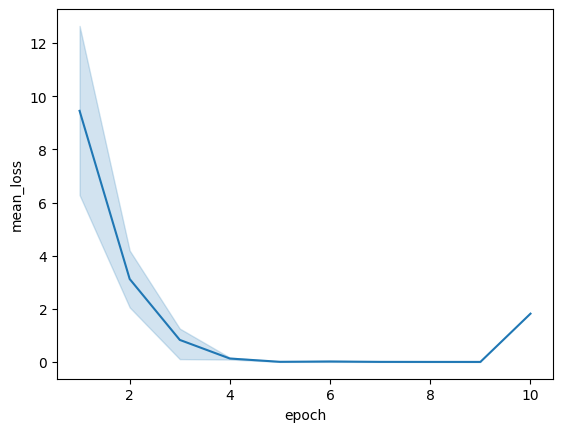

In [35]:
import pandas as pd
import seaborn as sns

model = operation.result()

snapshots = pd.DataFrame(model.tuning_task.snapshots)

sns.lineplot(data=snapshots, x = 'epoch', y='mean_loss')


1. Imports: pandas (for data analysis) and seaborn (for visualization).
2. Retrieve Results: operation.result() gets the completed fine-tuned model.
3. Snapshots: Training progress (like loss per epoch) is stored in a DataFrame.
4. Plot: A line plot shows how the "mean loss" decreases with each epoch, indicating how well the model is learning.

To evaluate the training process and ensure the model is improving (loss should decrease).

In [36]:
model = genai.GenerativeModel(model_name=f'tunedModels/{name}')

The fine-tuned model is loaded as a generative model, ready for content generation.


In [37]:
result = model.generate_content('55')
result.text

'56'

**What happens here?**

The fine-tuned model generates output for the input '55'.
result.text retrieves the generated response.

**Why are we doing this?**

To test the model and see if it predicts the next number correctly.

In [38]:
result = model.generate_content('123455')
result.text

'123456'

In [39]:
result = model.generate_content('four')
result.text

'five'

In [40]:
result = model.generate_content('quatre') # French 4
result.text                               # French 5 is "cinq"

'cinq'

In [41]:
result = model.generate_content('III')    # Roman numeral 3
result.text                               # Roman numeral 4 is IV

'IV'

In [42]:
result = model.generate_content('七')  # Japanese 7
result.text                            # Japanese 8 is 八!

'八'

In [ ]:
genai.update_tuned_model(f'tunedModels/{name}', {"description":"This is my model."});

**What happens here?**

Updates the metadata of your fine-tuned model, adding a description.

**Why are we doing this?**

To document your model so it’s easier to identify later.

In [ ]:
model = genai.get_tuned_model(f'tunedModels/{name}')

model.description


Updates the metadata of your fine-tuned model, adding a description.

To document your model so it’s easier to identify later.

In [ ]:
genai.delete_tuned_model(f'tunedModels/{name}')

Deletes the fine-tuned model.

To clean up your workspace if the model is no longer needed.

In [ ]:
try:
  m = genai.get_tuned_model(f'tunedModels/{name}')
  print(m)
except Exception as e:
  print(f"{type(e)}: {e}")

**What happens here?**

Tries to fetch the deleted model. If it’s not found, it raises an error and prints the error message.

**Why are we doing this?**


To confirm the model was successfully deleted.